In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
traindf = pd.read_csv("/kaggle/input/titanic/train.csv")
traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
traindf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


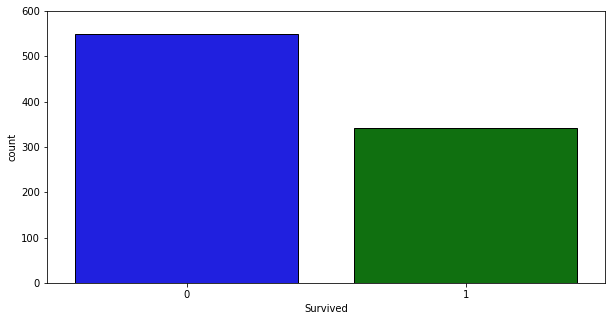

In [5]:
plt.subplots(figsize=(10,5))
plt.style.use('classic')
sns.countplot(traindf['Survived']);

Text(0.5, 0, 'age')

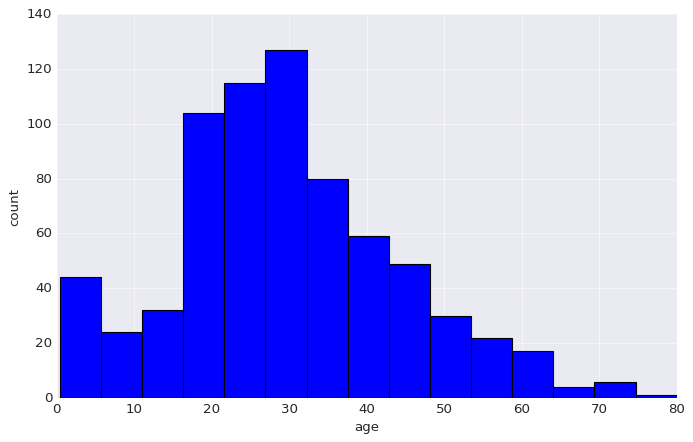

In [6]:

plt.style.use('seaborn-darkgrid')
ax, fig = plt.subplots(figsize=(10,6))
ax = plt.hist(traindf['Age'], bins=15)
plt.ylabel('count')
plt.xlabel('age')

In [7]:
heatmap = traindf.corr()

<AxesSubplot:>

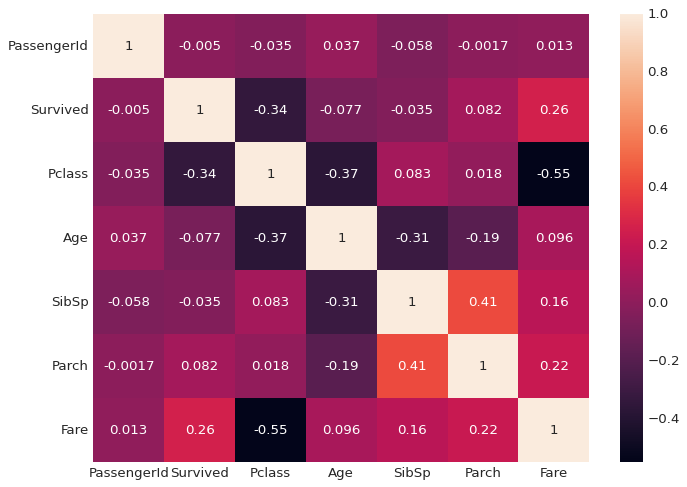

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(heatmap, annot=True)

### Filling missing values

In [9]:
traindf.isnull().sum()
traindf['Age'].fillna(traindf['Age'].mean(), inplace= True)
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
traindf['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## Data preprocessing 

In [11]:
traindf_embarked = pd.get_dummies(traindf['Embarked'], drop_first=True)
traindf_embarked


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [12]:
traindf_sex = pd.get_dummies(traindf['Sex'], drop_first=True)
traindf_sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [13]:
train_data = pd.concat([traindf, traindf_sex, traindf_embarked], axis=1)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0,0


In [14]:
train_data.drop(["PassengerId","Sex", "Embarked", "Ticket", "Cabin", "Name"], inplace=True, axis=1)
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


## Splitting data

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x = train_data.drop('Survived', axis = 1)
y = train_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [17]:
x_train.shape, x_test.shape

((712, 8), (179, 8))

## Fitting and scoring

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Random Forest Classifier

In [19]:

rff = RandomForestClassifier()
rff.fit(x_train, y_train)
rff_score = rff.score(x_test, y_test)   
print(f'Accuracy :{rff_score}')

Accuracy :0.8324022346368715


## KNeighbours Classifier

In [20]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
KNN_score = KNN.score(x_test, y_test)
print(f'Accuracy: {KNN_score}')


Accuracy: 0.7039106145251397


## Logistic Regression 

## Alt method


In [21]:
models = {"kn": KNeighborsClassifier(),
          "linear_model": LogisticRegression(solver='liblinear'),
          "rfc":RandomForestClassifier()
}
def fit_and_score(models, x_train, x_test, y_train, y_test):

    model_scores = {}
    for name, model in models.items():
        
        model.fit(x_train, y_train)
        
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'kn': 0.7039106145251397,
 'linear_model': 0.8100558659217877,
 'rfc': 0.8268156424581006}

## Model comparison

<AxesSubplot:>

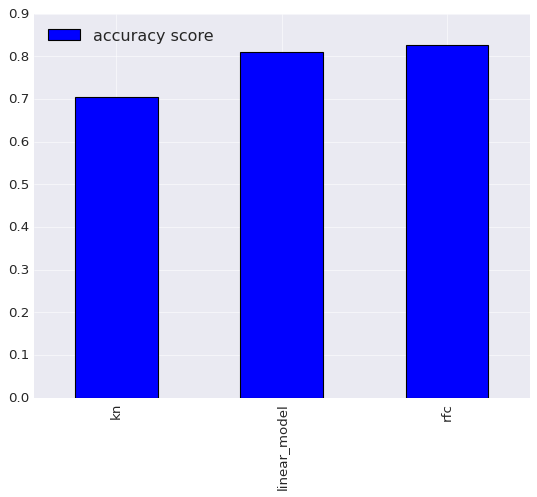

In [23]:
model_compare = pd.DataFrame(data=model_scores, index=['accuracy score'])
model_compare.T.plot(kind='bar')

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
rf_grid = { "n_estimators"  : np.arange(10, 1000, 50), 
            "max_depth": [None,5,10, 20, 30, 40, 50],
            "min_samples_split": [2, 5, 7, 10],
            "min_samples_leaf": np.arange(1, 20, 2),
            "bootstrap": [True, False],
}

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv = 5, n_iter=21, verbose=True)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=21,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20, 30, 40,
                                                      50],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [26]:
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'bootstrap': True}

In [27]:
rs_rf.score(x_test, y_test)

0.8547486033519553

## Looking at test data

In [28]:
testdf = pd.read_csv("/kaggle/input/titanic/test.csv")
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [30]:
testdf.drop(['PassengerId', 'Name','Cabin', 'Ticket'], axis=1, inplace =True)

In [31]:
testdf

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


## Filling missing values and encoding classification data

In [32]:
mean_age = testdf.Age.mean()
mean_age
testdf['Age'].fillna(mean_age, inplace=True)


In [33]:
testdf['Fare'].dropna(inplace=True)

In [34]:
testdf['Fare'].fillna(testdf.Fare.mean(), inplace=True)
testdf.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
testdf_embarked = pd.get_dummies(testdf.Embarked, drop_first = True)
testdf_embarked

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [36]:
testdf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [37]:
testdf_sex = pd.get_dummies(testdf.Sex, drop_first = True)
testdf_sex


,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [38]:
test_data = pd.concat([testdf, testdf_sex, testdf_embarked],axis = 1)

test_data.drop(['Embarked', 'Sex'], axis =1, inplace = True)
test_data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.50000,0,0,7.8292,1,1,0
1,3,47.00000,1,0,7.0000,0,0,1
2,2,62.00000,0,0,9.6875,1,1,0
3,3,27.00000,0,0,8.6625,1,0,1
4,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,1
414,1,39.00000,0,0,108.9000,0,0,0
415,3,38.50000,0,0,7.2500,1,0,1
416,3,30.27259,0,0,8.0500,1,0,1


## Moment of truth

In [39]:
final_pred = rff.predict(test_data)
pred = pd.DataFrame(final_pred)
pred

,0
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


In [40]:
export = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
export


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
export['Survived'] = pred
export['Survived']

0      0
1      0
2      0
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [42]:
export.to_csv('submission.csv')

# Prediction using tuned model

In [43]:
pred_final_2 = rs_rf.predict(test_data)

In [44]:
pred2 = pd.DataFrame(pred_final_2)

In [45]:
pred2

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [46]:
export_alt = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [47]:
export_alt['Survived'] = pred2
export_alt.Survived

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [48]:
export_alt.to_csv('submission2.csv')